# Load tables into SQLite

In [304]:
# https://www.w3schools.com/sql/sql_intro.asp
# https://docs.python.org/3/library/sqlite3.html

import mysql.connector
import sqlite3
import pandas as pd
import numpy as np

In [6]:
con = sqlite3.connect("w3_schools_tutorial.db")
cur = con.cursor()

In [62]:
cur.execute("DROP TABLE Customers")

In [24]:
res = cur.execute("SELECT * FROM sqlite_master;")
res.fetchall()

[]

In [63]:
csv_name = "./w3schools_sql_tutorial_customers_semicolon.csv"
table_name = "Customers"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df["CustomerID"] = df["CustomerID"].map(lambda x: int(x))
cur.execute('CREATE TABLE "Customers" (\n"CustomerID" INTEGER PRIMARY KEY,\n  "CustomerName" TEXT,\n  "ContactName" TEXT,\n  "Address" TEXT,\n  "City" TEXT,\n  "PostalCode" TEXT,\n  "Country" TEXT\n)')
df.to_sql(table_name, con, if_exists="append", index=False)

91

In [ ]:
csv_name = "./w3schools_sql_tutorial_products_semicolon.csv"
table_name = "Products"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)

77

In [113]:
csv_name = "./w3schools_sql_tutorial_orderdetails_semicolon.csv"
table_name = "OrderDetails"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)

518

In [175]:
csv_name = "./w3schools_sql_tutorial_customerorders_semicolon.csv"
table_name = "Orders"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)

196

In [214]:
csv_name = "./w3schools_sql_tutorial_productcategories_semicolon.csv"
table_name = "Categories"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)

8

In [232]:
csv_name = "./w3schools_sql_tutorial_shippers_semicolon.csv"
table_name = "Shippers"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)
df.dtypes

ShipperID       int64
ShipperName    object
Phone          object
dtype: object

In [240]:
csv_name = "./w3schools_sql_tutorial_employees_semicolon.csv"
table_name = "Employees"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)
df.dtypes

EmployeeID     int64
LastName      object
FirstName     object
BirthDate     object
Photo         object
Notes         object
dtype: object

In [246]:
csv_name = "./w3schools_sql_tutorial_suppliers_semicolon.csv"
table_name = "Suppliers"

df = pd.read_csv(csv_name, sep=";")
for col in df.columns:
    if df[col].dtype == np.dtype('O'):
        df[col] = df[col].map(lambda x: x.strip())
df.to_sql(table_name, con, if_exists="replace", index=False)
df.dtypes

SupplierID       int64
SupplierName    object
ContactName     object
Address         object
City            object
PostalCode      object
Country         object
Phone           object
dtype: object

In [48]:
# https://www.sqlite.org/schematab.html

# sqlite_master is a "schema table" that stores the database metadata
# Like table name, column names, etc.
# Query it using SQL

res = cur.execute("SELECT * FROM sqlite_master")
res.fetchall()

[('table',
  'Customers',
  'Customers',
  2,
  'CREATE TABLE "Customers" (\n"CustomerID" INTEGER PRIMARY KEY,\n  "CustomerName" TEXT,\n  "ContactName" TEXT,\n  "Address" TEXT,\n  "City" TEXT,\n  "PostalCode" TEXT,\n  "Country" TEXT\n)'),
 ('table',
  'Products',
  'Products',
  4,
  'CREATE TABLE "Products" (\n"ProductID" INTEGER,\n  "ProductName" TEXT,\n  "SupplierID" INTEGER,\n  "CategoryID" INTEGER,\n  "Unit" TEXT,\n  "Price" REAL\n)')]

# Load tables into MySQL

In [1]:
import mysql.connector
from dotenv import load_dotenv
import os
load_dotenv(override=True)


with open("northwind.sql", "r") as f:
    sql_script = f.read()

statements = [s.strip()+";" for s in sql_script.split(";") if s != '']

In [47]:
con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
)
cur = con.cursor()

In [329]:
for statement in statements:
    cur.execute(statement)

In [373]:
cur.execute("SHOW DATABASES;")

res = cur.fetchall()
print(res)

[('Northwind',), ('information_schema',), ('mysql',), ('performance_schema',), ('sys',)]


In [374]:
cur.execute("SHOW COLUMNS FROM OrderDetails IN Northwind;")

res = cur.fetchall()
print(res)

[('OrderDetailID', 'int', 'NO', 'PRI', None, 'auto_increment'), ('OrderID', 'int', 'YES', 'MUL', None, ''), ('ProductID', 'int', 'YES', 'MUL', None, ''), ('Quantity', 'int', 'YES', '', None, '')]


In [2]:
con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
    database="Northwind",
)
cur = con.cursor()

cur.execute("SHOW TABLES;")

res = cur.fetchall()
print(res)

[('Categories',), ('Customers',), ('CustomersBackup2025',), ('CustomersBackup2025Filtered',), ('CustomersBackup2025Fresh',), ('CustomersForInsert',), ('CustomersOrders',), ('Employees',), ('OrderDetails',), ('Orders',), ('Products',), ('ProductsNull',), ('Shippers',), ('Suppliers',)]


In [348]:
cur.execute("SELECT * FROM Customers;")

res = cur.fetchall()
print(res)

[(1, 'Alfreds Futterkiste', 'Maria Anders', 'Obere Str. 57', 'Berlin', '12209', 'Germany'), (2, 'Ana Trujillo Emparedados y helados', 'Ana Trujillo', 'Avda. de la Constitución 2222', 'México D.F.', '5021', 'Mexico'), (3, 'Antonio Moreno Taquería', 'Antonio Moreno', 'Mataderos 2312', 'México D.F.', '5023', 'Mexico'), (4, 'Around the Horn', 'Thomas Hardy', '120 Hanover Sq.', 'London', 'WA1 1DP', 'UK'), (5, 'Berglunds snabbköp', 'Christina Berglund', 'Berguvsvägen 8', 'Luleå', 'S-958 22', 'Sweden'), (6, 'Blauer See Delikatessen', 'Hanna Moos', 'Forsterstr. 57', 'Mannheim', '68306', 'Germany'), (7, 'Blondel père et fils', 'Frédérique Citeaux', '24, place Kléber', 'Strasbourg', '67000', 'France'), (8, 'Bólido Comidas preparadas', 'Martín Sommer', 'C/ Araquil, 67', 'Madrid', '28023', 'Spain'), (9, "Bon app''", 'Laurence Lebihans', '12, rue des Bouchers', 'Marseille', '13008', 'France'), (10, 'Bottom-Dollar Marketse', 'Elizabeth Lincoln', '23 Tsawassen Blvd.', 'Tsawassen', 'T2F 8M4', 'Canada'

# SELECT, SELECT DISTINCT, WHERE

The SELECT statement is used to select data from a database.

**<u>Syntax:</u>**
```sql
SELECT column1, column2, ...
FROM table_name;
```

The SELECT DISTINCT statement is used to return only distinct (different) values.

**<u>Syntax:</u>**
```sql
SELECT DISTINCT column1, column2, ...
FROM table_name;
```

The WHERE clause is used to filter records.

**<u>Syntax:</u>**
```sql
SELECT column1, column2, ...
FROM table_name
WHERE condition;
```

**Note:** The WHERE clause is not only used in SELECT statements, it is also used in UPDATE, DELETE, etc.!

SQL requires single quotes around text values (most database systems will also allow double quotes). However, numeric fields should not be enclosed in quotes.

All operators:
```
=           Equal
>           Greater than
<           Less than
>=          Greater than or equal
<=          Less than or equal
<>          Not equal (sometimes != in some versions of SQL)
BETWEEN     Between a certain range
LIKE        Search for a pattern
IN          To specify multiple possible values for a column
```

In [ ]:
res = cur.execute("SELECT * FROM Customers;")
res = cur.execute("SELECT CustomerName, City FROM Customers;")
res = cur.execute("SELECT CustomerName, City FROM Customers LIMIT 5")
res.fetchall()

In [6]:
res = cur.execute("SELECT DISTINCT Country FROM Customers;")
# res = cur.execute("SELECT DISTINCT Country, City FROM Customers;")
# res = cur.execute("SELECT DISTINCT City FROM Customers;")
res_fetch = res.fetchall()
print(len(res_fetch))
res_fetch

21


[('Germany',),
 ('Mexico',),
 ('UK',),
 ('Sweden',),
 ('France',),
 ('Spain',),
 ('Canada',),
 ('Argentina',),
 ('Switzerland',),
 ('Brazil',),
 ('Austria',),
 ('Italy',),
 ('Portugal',),
 ('USA',),
 ('Venezuela',),
 ('Ireland',),
 ('Belgium',),
 ('Norway',),
 ('Denmark',),
 ('Finland',),
 ('Poland',)]

In [7]:
res = cur.execute("SELECT COUNT(DISTINCT Country) FROM Customers;")
res.fetchall()

[(21,)]

In [ ]:
res = cur.execute("SELECT CustomerName, City FROM Customers \
                  WHERE Country='Mexico';")
res = cur.execute("SELECT * FROM Customers \
                  WHERE CustomerID=1;")
res = cur.execute("SELECT CustomerID, CustomerName from Customers \
                  WHERE CustomerID>80;")
res = cur.execute("SELECT CustomerID FROM Customers \
                  WHERE CustomerID <> 1;")
res = cur.execute("Select CustomerID, CustomerName FROM Customers \
                  WHERE CustomerID BETWEEN 50 AND 60;")
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE 's%';")
res = cur.execute("SELECT CustomerName, City FROM Customers \
                  WHERE City IN ('Paris', 'London');")

res.fetchall()

[(1,
  'Alfreds Futterkiste',
  'Maria Anders',
  'Obere Str. 57',
  'Berlin',
  '12209',
  'Germany'),
 (2,
  'Ana Trujillo Emparedados y helados',
  'Ana Trujillo',
  'Avda. de la Constitución 2222',
  'México D.F.',
  '05021',
  'Mexico'),
 (3,
  'Antonio Moreno Taquería',
  'Antonio Moreno',
  'Mataderos 2312',
  'México D.F.',
  '05023',
  'Mexico')]

# ORDER BY

The ORDER BY keyword sorts the records in ascending order by default. To sort the records in descending order, use the DESC keyword.

For string values the ORDER BY keyword will order alphabetically. To sort the table reverse alphabetically, use the DESC keyword.

You can sort by multiple columns (sort by Col A, then by Col B, etc.). You can also specify ASC/DESC for each column.
```sql
SELECT column1, column2, ...
FROM table_name
ORDER BY column1 ASC|DESC, column2 ASC|DESC, ... ;
```

In [ ]:
res = cur.execute("SELECT * FROM sqlite_master WHERE name='Products'")
print(res.fetchone())

res = cur.execute("SELECT * FROM Products \
                  ORDER BY Price;")
res = cur.execute("SELECT * FROM Products \
                  ORDER BY Price DESC;")
res = cur.execute("SELECT * FROM Products \
                  ORDER BY ProductName;")
res = cur.execute("SELECT * FROM Products \
                  ORDER BY ProductName DESC;")
res.fetchall()

('table', 'Products', 'Products', 3, 'CREATE TABLE "Products" (\n"ProductID" INTEGER,\n  "ProductName" TEXT,\n  "SupplierID" INTEGER,\n  "CategoryID" INTEGER,\n  "Unit" TEXT,\n  "Price" REAL\n)')


[(33, 'Geitost', 15, 4, '500 g', 2.5),
 (24, 'Guaraná Fantástica', 10, 1, '12 - 355 ml cans', 4.5),
 (13, 'Konbu', 6, 8, '2 kg box', 6.0),
 (52, 'Filo Mix', 24, 5, '16 - 2 kg boxes', 7.0),
 (54, 'Tourtière', 25, 6, '16 pies', 7.45),
 (75, 'Rhönbräu Klosterbier', 12, 1, '24 - 0.5 l bottles', 7.75),
 (23, 'Tunnbröd', 9, 5, '12 - 250 g pkgs.', 9.0),
 (19, 'Teatime Chocolate Biscuits', 8, 3, '10 boxes x 12 pieces', 9.2),
 (45, 'Røgede sild', 21, 8, '1k pkg.', 9.5),
 (47, 'Zaanse koeken', 22, 3, '10 - 4 oz boxes', 9.5),
 (41, "Jack's New England Clam Chowder", 19, 8, '12 - 12 oz cans', 9.65),
 (3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10.0),
 (21, "Sir Rodney's Scones", 8, 3, '24 pkgs. x 4 pieces', 10.0),
 (74, 'Longlife Tofu', 4, 7, '5 kg pkg.', 10.0),
 (46, 'Spegesild', 21, 8, '4 - 450 g glasses', 12.0),
 (31, 'Gorgonzola Telino', 14, 4, '12 - 100 g pkgs', 12.5),
 (68, 'Scottish Longbreads', 8, 3, '10 boxes x 8 pieces', 12.5),
 (48, 'Chocolade', 22, 3, '10 pkgs.', 12.75),
 (77, 'O

In [ ]:
res = cur.execute("SELECT * FROM sqlite_master WHERE name='Customers'")
print(res.fetchone())

# Orders by Country, but if some rows have the same Country, it orders them by CustomerName
res = cur.execute("""SELECT * FROM Customers
                  ORDER BY Country, CustomerName;""")
res = cur.execute("SELECT * FROM Customers \
                  ORDER BY Country ASC, CustomerName ASC;")
res.fetchall()

('table', 'Customers', 'Customers', 2, 'CREATE TABLE "Customers" (\n"CustomerID" INTEGER,\n  "CustomerName" TEXT,\n  "ContactName" TEXT,\n  "Address" TEXT,\n  "City" TEXT,\n  "PostalCode" TEXT,\n  "Country" TEXT\n)')


[(12,
  'Cactus Comidas para llevar',
  'Patricio Simpson',
  'Cerrito 333',
  'Buenos Aires',
  '1010',
  'Argentina'),
 (54,
  'Océano Atlántico Ltda.',
  'Yvonne Moncada',
  'Ing. Gustavo Moncada 8585 Piso 20-A',
  'Buenos Aires',
  '1010',
  'Argentina'),
 (64,
  'Rancho grande',
  'Sergio Gutiérrez',
  'Av. del Libertador 900',
  'Buenos Aires',
  '1010',
  'Argentina'),
 (20,
  'Ernst Handel',
  'Roland Mendel',
  'Kirchgasse 6',
  'Graz',
  '8010',
  'Austria'),
 (59,
  'Piccolo und mehr',
  'Georg Pipps',
  'Geislweg 14',
  'Salzburg',
  '5020',
  'Austria'),
 (50,
  'Maison Dewey',
  'Catherine Dewey',
  'Rue Joseph-Bens 532',
  'Bruxelles',
  'B-1180',
  'Belgium'),
 (76,
  'Suprêmes délices',
  'Pascale Cartrain',
  'Boulevard Tirou, 255',
  'Charleroi',
  'B-6000',
  'Belgium'),
 (15,
  'Comércio Mineiro',
  'Pedro Afonso',
  'Av. dos Lusíadas, 23',
  'São Paulo',
  '05432-043',
  'Brazil'),
 (21,
  'Familia Arquibaldo',
  'Aria Cruz',
  'Rua Orós, 92',
  'São Paulo',
  '05

# AND, OR, NOT

The WHERE clause can contain one or many AND/OR operators.

The AND and OR operators are used to filter records based on more than one condition.

**<u>Syntax:</u>**
```sql
SELECT column1, column2, ...
FROM table_name
WHERE condition1 AND condition2 AND condition3 ...; 

SELECT column1, column2, ...
FROM table_name
WHERE condition1 OR condition2 OR condition3 ...;
```

The NOT operator is used in combination with other operators to give the opposite result, also called the negative result. 

**<u>Syntax:</u>**
```sql
SELECT column1, column2, ...
FROM table_name
WHERE NOT condition;
```

In [52]:
res = cur.execute("SELECT * FROM Customers \
                  WHERE Country='Spain' AND CustomerName LIKE 'g%';")
res = cur.execute("SELECT * FROM Customers \
                  WHERE Country='Brazil' AND City='Rio de Janeiro' AND CustomerID>50;")
res = cur.execute("SELECT * FROM Customers \
                  WHERE Country='Spain' AND (CustomerName LIKE 'G%' OR CustomerName LIKE 'R%');")
res = cur.execute("SELECT * FROM Customers \
                  WHERE Country='Spain' AND CustomerName LIKE 'G%' OR CustomerName LIKE 'R%';")
res.fetchall()

[(29,
  'Galería del gastrónomo',
  'Eduardo Saavedra',
  'Rambla de Cataluña, 23',
  'Barcelona',
  '08022',
  'Spain'),
 (30,
  'Godos Cocina Típica',
  'José Pedro Freyre',
  'C/ Romero, 33',
  'Sevilla',
  '41101',
  'Spain'),
 (64,
  'Rancho grande',
  'Sergio Gutiérrez',
  'Av. del Libertador 900',
  'Buenos Aires',
  '1010',
  'Argentina'),
 (65,
  'Rattlesnake Canyon Grocery',
  'Paula Wilson',
  '2817 Milton Dr.',
  'Albuquerque',
  '87110',
  'USA'),
 (66,
  'Reggiani Caseifici',
  'Maurizio Moroni',
  'Strada Provinciale 124',
  'Reggio Emilia',
  '42100',
  'Italy'),
 (67,
  'Ricardo Adocicados',
  'Janete Limeira',
  'Av. Copacabana, 267',
  'Rio de Janeiro',
  '02389-890',
  'Brazil'),
 (68,
  'Richter Supermarkt',
  'Michael Holz',
  'Grenzacherweg 237',
  'Genève',
  '1203',
  'Switzerland'),
 (69,
  'Romero y tomillo',
  'Alejandra Camino',
  'Gran Vía, 1',
  'Madrid',
  '28001',
  'Spain')]

In [65]:
res = cur.execute("SELECT * FROM Customers \
                  WHERE NOT Country='Spain';")
res = cur.execute("SELECT * FROM Customers \
                  WHERE CustomerName NOT LIKE 'A%';")
# res_fetch1 = res.fetchall()
res = cur.execute("SELECT * FROM Customers \
                  WHERE NOT CustomerName LIKE 'A%';")
# res_fetch2 = res.fetchall()
# print(res_fetch1 == res_fetch2)
res = cur.execute("SELECT * FROM Customers \
                  WHERE CustomerID NOT BETWEEN 10 AND 60;")
res = cur.execute("SELECT * FROM Customers \
                  WHERE City NOT IN ('Paris', 'London');")
res = cur.execute("SELECT * FROM Customers \
                  WHERE NOT CustomerID > 50;")
res = cur.execute("SELECT * FROM Customers \
                  WHERE NOT CustomerID < 50;")

res_fetch = res.fetchall()
print(len(res_fetch))
# res_fetch

42


# INSERT INTO

The INSERT INTO statement is used to insert new records in a table.

It is possible to write the INSERT INTO statement in two ways.

1. Specify both the column names and the values to be inserted:
    ```sql
    INSERT INTO table_name (column1, column2, column3, ...)
    VALUES (value1, value2, value3, ...); 
    ```

2. If you are adding values for all the columns of the table, you do not need to specify the column names in the SQL query. However, make sure the order of the values is in the same order as the columns in the table. Here, the INSERT INTO syntax would be as follows:
    ```sql
    INSERT INTO table_name
    VALUES (value1, value2, value3, ...); 
    ```

It is also possible to only insert data in specific columns (the other columns will be null).

It is also possible to insert multiple rows in one statement.

In [ ]:
# Because we specified CustomerID as INTEGER PRIMARY KEY when creating the table, it is automatically generated upon insertion (so no need to explicitly insert it)

cur.execute("INSERT INTO Customers \
            (CustomerName, ContactName, Address, City, PostalCode, Country) \
            VALUES ('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway');")

In [50]:
res = cur.execute("SELECT * FROM Customers WHERE CustomerID > 90;")
res.fetchall()

[(91, 'Wolski', 'Zbyszek', 'ul. Filtrowa 68', 'Walla', '01-012', 'Poland'),
 (92,
  'Cardinal',
  'Tom B. Erichsen',
  'Skagen 21',
  'Stavanger',
  '4006',
  'Norway')]

In [51]:
cur.execute("INSERT INTO Customers \
            (CustomerName, City, Country) \
            VALUES ('Cardinal', 'Stavanger', 'Norway');")

res = cur.execute("SELECT * FROM Customers WHERE CustomerID > 90;")
res.fetchall()

[(91, 'Wolski', 'Zbyszek', 'ul. Filtrowa 68', 'Walla', '01-012', 'Poland'),
 (92,
  'Cardinal',
  'Tom B. Erichsen',
  'Skagen 21',
  'Stavanger',
  '4006',
  'Norway'),
 (93, 'Cardinal', None, None, 'Stavanger', None, 'Norway')]

In [52]:
cur.execute("INSERT INTO Customers \
            (CustomerName, ContactName, Address, City, PostalCode, Country) \
            VALUES \
            ('Cardinal', 'Tom B. Erichsen', 'Skagen 21', 'Stavanger', '4006', 'Norway'), \
            ('Greasy Burger', 'Per Olsen', 'Gateveien 15', 'Sandnes', '4306', 'Norway'), \
            ('Tasty Tee', 'Finn Egan', 'Streetroad 19B', 'Liverpool', 'L1 0AA', 'UK');")
res = cur.execute("SELECT * FROM Customers WHERE CustomerID > 90;")
res.fetchall()

[(91, 'Wolski', 'Zbyszek', 'ul. Filtrowa 68', 'Walla', '01-012', 'Poland'),
 (92,
  'Cardinal',
  'Tom B. Erichsen',
  'Skagen 21',
  'Stavanger',
  '4006',
  'Norway'),
 (93, 'Cardinal', None, None, 'Stavanger', None, 'Norway'),
 (94,
  'Cardinal',
  'Tom B. Erichsen',
  'Skagen 21',
  'Stavanger',
  '4006',
  'Norway'),
 (95,
  'Greasy Burger',
  'Per Olsen',
  'Gateveien 15',
  'Sandnes',
  '4306',
  'Norway'),
 (96, 'Tasty Tee', 'Finn Egan', 'Streetroad 19B', 'Liverpool', 'L1 0AA', 'UK')]

# IS (NOT) NULL

A field with a NULL value is a field with no value.

If a field in a table is optional, it is possible to insert a new record or update a record without adding a value to this field. Then, the field will be saved with a NULL value.

It is not possible to test for NULL values with comparison operators, such as =, <, or <>.

We will have to use the IS NULL and IS NOT NULL operators instead.

**<u>Syntax:</u>**
```sql
SELECT column_names
FROM table_name
WHERE column_name IS NULL; 

SELECT column_names
FROM table_name
WHERE column_name IS NOT NULL; 
```

In [54]:
res = cur.execute("SELECT CustomerName, ContactName, Address \
                  FROM Customers \
                  WHERE Address IS NULL;")
res = cur.execute("SELECT CustomerName, ContactName, Address \
                  FROM Customers \
                  WHERE Address IS NOT NULL;")

res.fetchall()

[('Alfreds Futterkiste', 'Maria Anders', 'Obere Str. 57'),
 ('Ana Trujillo Emparedados y helados',
  'Ana Trujillo',
  'Avda. de la Constitución 2222'),
 ('Antonio Moreno Taquería', 'Antonio Moreno', 'Mataderos 2312'),
 ('Around the Horn', 'Thomas Hardy', '120 Hanover Sq.'),
 ('Berglunds snabbköp', 'Christina Berglund', 'Berguvsvägen 8'),
 ('Blauer See Delikatessen', 'Hanna Moos', 'Forsterstr. 57'),
 ('Blondel père et fils', 'Frédérique Citeaux', '24, place Kléber'),
 ('Bólido Comidas preparadas', 'Martín Sommer', 'C/ Araquil, 67'),
 ("Bon app'", 'Laurence Lebihans', '12, rue des Bouchers'),
 ('Bottom-Dollar Marketse', 'Elizabeth Lincoln', '23 Tsawassen Blvd.'),
 ("B's Beverages", 'Victoria Ashworth', 'Fauntleroy Circus'),
 ('Cactus Comidas para llevar', 'Patricio Simpson', 'Cerrito 333'),
 ('Centro comercial Moctezuma', 'Francisco Chang', 'Sierras de Granada 9993'),
 ('Chop-suey Chinese', 'Yang Wang', 'Hauptstr. 29'),
 ('Comércio Mineiro', 'Pedro Afonso', 'Av. dos Lusíadas, 23'),
 ('C

# UPDATE

The UPDATE statement is used to modify the existing records in a table.

**<u>Syntax:</u>**
```sql
UPDATE table_name
SET column1 = value1, column2 = value2, ...
WHERE condition; 
```

**Note:** Be careful when updating records in a table! Notice the WHERE clause in the UPDATE statement. The WHERE clause specifies which record(s) that should be updated. If you omit the WHERE clause, all records in the table will be updated!

It is the WHERE clause that determines how many records will be updated.

**Be careful when updating records. If you omit the WHERE clause, ALL records will be updated!**

In [57]:
cur.execute("UPDATE Customers \
            SET ContactName='Alfred Schmidt', City='Frankfurt' \
            WHERE CustomerID=1;")
res = cur.execute("SELECT * FROM Customers \
                  WHERE CustomerID=1;")
cur.execute("UPDATE Customers \
            SET ContactName='Juan' \
            WHERE Country='Mexico';")
res = cur.execute("SELECT ContactName From Customers \
                  WHERE Country='Mexico';")
cur.execute("Update Customers \
            SET ContactName='Juan';")
res = cur.execute("SELECT * From Customers;")
res.fetchall()

[(1,
  'Alfreds Futterkiste',
  'Juan',
  'Obere Str. 57',
  'Frankfurt',
  '12209',
  'Germany'),
 (2,
  'Ana Trujillo Emparedados y helados',
  'Juan',
  'Avda. de la Constitución 2222',
  'México D.F.',
  '05021',
  'Mexico'),
 (3,
  'Antonio Moreno Taquería',
  'Juan',
  'Mataderos 2312',
  'México D.F.',
  '05023',
  'Mexico'),
 (4, 'Around the Horn', 'Juan', '120 Hanover Sq.', 'London', 'WA1 1DP', 'UK'),
 (5,
  'Berglunds snabbköp',
  'Juan',
  'Berguvsvägen 8',
  'Luleå',
  'S-958 22',
  'Sweden'),
 (6,
  'Blauer See Delikatessen',
  'Juan',
  'Forsterstr. 57',
  'Mannheim',
  '68306',
  'Germany'),
 (7,
  'Blondel père et fils',
  'Juan',
  '24, place Kléber',
  'Strasbourg',
  '67000',
  'France'),
 (8,
  'Bólido Comidas preparadas',
  'Juan',
  'C/ Araquil, 67',
  'Madrid',
  '28023',
  'Spain'),
 (9,
  "Bon app'",
  'Juan',
  '12, rue des Bouchers',
  'Marseille',
  '13008',
  'France'),
 (10,
  'Bottom-Dollar Marketse',
  'Juan',
  '23 Tsawassen Blvd.',
  'Tsawassen',
  'T2

# DELETE

The DELETE statement is used to delete existing records in a table.

**<u>Syntax:</u>**
```sql
DELETE FROM table_name WHERE condition;
```

**Note:** Be careful when deleting records in a table! Notice the WHERE clause in the DELETE statement. The WHERE clause specifies which record(s) should be deleted. If you omit the WHERE clause, all records in the table will be deleted!

It is possible to delete all rows in a table without deleting the table. This means that the table structure, attributes, and indexes will be intact.

In [ ]:
cur.execute("DELETE FROM Customers WHERE CustomerName='Alfreds Futterkiste';")

res = cur.execute("SELECT * FROM Customers WHERE CustomerID < 5;")
res.fetchall()

In [60]:
cur.execute("DELETE FROM Customers;")

res = cur.execute("SELECT * FROM Customers;")
res.fetchall()

[]

# SELECT TOP/LIMIT, OFFSET

The SELECT TOP clause is used to specify the number of records to return.

The SELECT TOP clause is useful on large tables with thousands of records. Returning a large number of records can impact performance.

In MySQL/SQLite, LIMIT is used instead.
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
ORDER BY column_name(s)
LIMIT number;
```

In SQLite, you can OFFSET the returned records (pagination).
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
ORDER BY column_name(s)
LIMIT number
OFFSET number;
```

In [75]:
res = cur.execute("SELECT * FROM Customers LIMIT 3;")
res = cur.execute("SELECT * FROM Customers WHERE Country='Germany' LIMIT 3;")
res = cur.execute("SELECT * FROM Customers WHERE Country='Germany' ORDER BY CustomerName LIMIT 3;")
res = cur.execute("SELECT * FROM Customers WHERE Country='Germany' ORDER BY CustomerName LIMIT 3 OFFSET 2;")
res.fetchall()

[(86,
  'Die Wandernde Kuh',
  'Rita Müller',
  'Adenauerallee 900',
  'Stuttgart',
  '70563',
  'Germany'),
 (17,
  'Drachenblut Delikatessend',
  'Sven Ottlieb',
  'Walserweg 21',
  'Aachen',
  '52066',
  'Germany'),
 (25,
  'Frankenversand',
  'Peter Franken',
  'Berliner Platz 43',
  'München',
  '80805',
  'Germany')]

# Aggregate Functions

## MIN(), MAX()

An aggregate function is a function that performs a calculation on a set of values, and returns a single value.

Aggregate functions are often used with the GROUP BY clause of the SELECT statement. The GROUP BY clause splits the result-set into groups of values and the aggregate function can be used to return a single value for each group.

The most commonly used SQL aggregate functions are:

    MIN() - returns the smallest value within the selected column
    MAX() - returns the largest value within the selected column
    COUNT() - returns the number of rows in a set
    SUM() - returns the total sum of a numerical column
    AVG() - returns the average value of a numerical column

Aggregate functions ignore null values (except for COUNT()).

**<u>Syntax:</u>**
```sql
SELECT MIN(column_name1)
FROM table_name
WHERE condition
GROUP BY column_name2; 

SELECT MAX(column_name1)
FROM table_name
WHERE condition
GROUP BY column_name2;
```

In [106]:
res = cur.execute("SELECT MIN(Price) FROM Products;")
res = cur.execute("SELECT MAX(Price) FROM Products;")

# When you use MIN() or MAX(), the returned column will not have a descriptive name. To give the column a descriptive name, use the AS keyword
res = cur.execute("SELECT MIN(Price) AS MinPrice \
                  FROM Products;")

# Here we use the MIN() function and the GROUP BY clause, to return the smallest price for each category in the Products table.
res = cur.execute("SELECT MIN(Price) AS MinPrice, CategoryID \
                  FROM Products \
                  GROUP BY CategoryID;")

res = cur.execute("SELECT MAX(Price) AS MaxPrice, CategoryID \
                  FROM Products \
                  WHERE Price < 50 \
                  GROUP BY CategoryID;")

print(res.description)
res.fetchall()

(('MaxPrice', None, None, None, None, None, None), ('CategoryID', None, None, None, None, None, None))


[(46.0, 1),
 (43.9, 2),
 (49.3, 3),
 (38.0, 4),
 (38.0, 5),
 (39.0, 6),
 (45.6, 7),
 (31.0, 8)]

## COUNT()

The COUNT() function returns the number of rows that matches a specified criterion.

Aggregate functions ignore null values (except for COUNT()).

**<u>Syntax:</u>**
```sql
SELECT COUNT(column_name1)
FROM table_name
WHERE condition
GROUP BY column_name2; 
```

You can specify a column name instead of the asterix symbol (*).

If you specify a column name instead of (*), NULL values will not be counted.

You can ignore duplicates by using the DISTINCT keyword in the COUNT() function.

If DISTINCT is specified, rows with the same value for the specified column will be counted as one.

In [108]:
# Find the total number of rows in the table
res = cur.execute("SELECT COUNT(*) FROM Products;")

res = cur.execute("SELECT COUNT(ProductName) FROM Products;")
res = cur.execute("SELECT COUNT(ProductName) FROM Products WHERE Price > 20;")
res = cur.execute("SELECT COUNT(DISTINCT SupplierID) FROM Products;")
res = cur.execute("SELECT COUNT(Distinct ProductName) FROM Products;")

# Give the counted column a name by using the AS keyword.
res = cur.execute("SELECT COUNT(*) AS 'Number of Records' FROM Products")

# Here we use the COUNT() function and the GROUP BY clause, to return the number of records for each category in the Products table
res = cur.execute("SELECT COUNT(*) AS 'Number of Records with Price < 50', CategoryID \
                  FROM Products \
                  WHERE Price < 50 \
                  GROUP BY CategoryID;")

print(res.description)
res.fetchall()

(('Number of Records with Price < 50', None, None, None, None, None, None), ('CategoryID', None, None, None, None, None, None))


[(11, 1), (12, 2), (12, 3), (9, 4), (7, 5), (4, 6), (4, 7), (11, 8)]

## SUM()

The SUM() function returns the total sum of a numeric column.

**<u>Syntax:</u>**
```sql
SELECT SUM(column_name1)
FROM table_name
WHERE condition
GROUP BY column_name2;
```

The parameter inside the SUM() function can also be an expression.

We can also join the OrderDetails table to the Products table to find the actual amount, instead of assuming it is 10 dollars.

In [134]:
res = cur.execute("SELECT SUM(Quantity) AS 'Product 11 Quantity' \
                  FROM OrderDetails \
                  WHERE ProductId=11;")
res = cur.execute("SELECT OrderID, SUM(Quantity) AS 'Quantity Per Order' \
                  FROM OrderDetails \
                  GROUP BY OrderID;")
res = cur.execute("SELECT SUM(Quantity * 10) FROM OrderDetails;")
res = cur.execute("SELECT SUM(Quantity*Price) \
                  FROM OrderDetails \
                  LEFT JOIN Products ON OrderDetails.ProductID=Products.ProductID;")

print(res.description)
res.fetchall()

(('SUM(Quantity*Price)', None, None, None, None, None, None),)


[(386424.23,)]

## AVG()

The AVG() function returns the average value of a numeric column.

**<u>Syntax:</u>**
```sql
SELECT AVG(column_name1)
FROM table_name
WHERE condition
GROUP BY column_name2;
```

To list all records with a higher price than average, we can use the AVG() function in a sub query.

In [142]:
res = cur.execute("SELECT AVG(Price) FROM Products;")
res = cur.execute("SELECT AVG(Price) AS 'AvgPrice Category1' \
                  FROM Products \
                  WHERE CategoryID=1;")
res = cur.execute("SELECT * From Products \
                  WHERE Price > (SELECT AVG(Price) FROM Products);")
res = cur.execute("SELECT AVG(Price) AS AveragePrice, CategoryID \
                  FROM Products \
                  GROUP BY CategoryID;")

print(res.description)
res.fetchall()

(('AveragePrice', None, None, None, None, None, None), ('CategoryID', None, None, None, None, None, None))


[(37.979166666666664, 1),
 (23.0625, 2),
 (25.16, 3),
 (28.73, 4),
 (20.25, 5),
 (54.00666666666667, 6),
 (32.37, 7),
 (20.6825, 8)]

# LIKE

The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

There are two wildcards often used in conjunction with the LIKE operator:
* The percent sign % represents zero, one, or multiple characters
* The underscore sign _ represents one, single character

**<u>Syntax:</u>**
```sql
SELECT column1, column2, ...
FROM table_name
WHERE columnN LIKE pattern; 
```

The _ wildcard represents a single character.

It can be any character or number, but each _ represents one, and only one, character.

The % wildcard represents any number of characters, even zero characters. 

To return records that starts with a specific letter or phrase, add the % at the end of the letter or phrase.

You can also combine any number of conditions using AND or OR operators.

If no wildcard is specified, the phrase has to have an exact match to return a result.


In [ ]:
res = cur.execute("SELECT City FROM Customers \
                  WHERE City LIKE 'L_nd__';")
# Return all customers from a city that contains the letter 'L'
res = cur.execute("SELECT DISTINCT City FROM Customers \
                  WHERE City LIKE '%L%' \
                  ORDER BY City;")
res = cur.execute("SELECT CustomerName FROM Customers \
                 WHERE CustomerName LIKE 'La%' \
                 ORDER BY CustomerName;")
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE (CustomerName LIKE 'a%') OR \
                  (CustomerName LIKE 'b%') \
                  ORDER BY CustomerName;")
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE '%a';")
# Return all customers that starts with "b" and ends with "s"
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE 'b%s';")
# To return records that contains a specific letter or phrase, add the % both before and after the letter or phrase.
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE '%or%';")
# Return all customers that starts with "a" and are at least 3 characters in length
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE 'a__%';")
# Return all customers that have "r" in the second position
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE '_r%';")
# If no wildcard is specified, the phrase has to have an exact match to return a result.
res = cur.execute("SELECT CustomerName, Country FROM Customers \
                  WHERE Country LIKE 'Spain';")
print(res.description)
res.fetchall()

(('CustomerName', None, None, None, None, None, None), ('Country', None, None, None, None, None, None))


[('Bólido Comidas preparadas', 'Spain'),
 ('FISSA Fabrica Inter. Salchichas S.A.', 'Spain'),
 ('Galería del gastrónomo', 'Spain'),
 ('Godos Cocina Típica', 'Spain'),
 ('Romero y tomillo', 'Spain')]

## Wildcard characters

A wildcard character is used to substitute one or more characters in a string.

Wildcard characters are used with the LIKE operator. The LIKE operator is used in a WHERE clause to search for a specified pattern in a column.

|Symbol|Description|
|------|-----------|
|%|Represents zero or more characters|
|_|Represents a single character|
|[]|Represents any single character within the brackets *|
|^|Represents any character not in the brackets *|
|-|Represents any single character within the specified range *|
|{}|Represents any escaped character **|

(*) Not supported in PostgreSQL and MySQL databases.  
(**) Supported only in Oracle databases.

The [] wildcard returns a result if any of the characters inside gets a match.

The - wildcard allows you to specify a range of characters inside the [] wildcard.

In [166]:
# Return all customers starting with either "b", "s", or "p"
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE '[bsp]%';")
# Return all customers starting with "a", "b", "c", "d", "e" or "f"
res = cur.execute("SELECT CustomerName FROM Customers \
                  WHERE CustomerName LIKE '[a-f]%';")

print(res.description)
res.fetchall()

(('CustomerName', None, None, None, None, None, None),)


[]

# IN

The IN operator allows you to specify multiple values in a WHERE clause.

The IN operator is a shorthand for multiple OR conditions.

**<u>Syntax:</u>**
```sql
SELECT column_name(s)
FROM table_name
WHERE column_name IN (value1, value2, ...);
```

By using the NOT keyword in front of the IN operator, you return all records that are NOT any of the values in the list.

You can also use IN with a subquery in the WHERE clause. With a subquery you can return all records from the main query that are present in the result of the subquery.

In [ ]:
res = cur.execute("SELECT CustomerName, Country FROM Customers \
                  WHERE Country IN ('Germany', 'France', 'UK');")
res = cur.execute("SELECT CustomerName, Country FROM Customers \
                  WHERE Country NOT IN ('Germany', 'France', 'UK');")

# Return all customers that have an order in the Orders table
res = cur.execute("SELECT COUNT(*) FROM Customers;") # 91 total customers
res = cur.execute("SELECT COUNT(*) FROM Customers \
                  WHERE CustomerID IN (SELECT CustomerID FROM Orders);") # 74 customers have placed orders
res = cur.execute("SELECT COUNT(*) FROM Customers \
                  WHERE CustomerID NOT IN (SELECT CustomerID FROM Orders);") # 17 customers haven't placed orders

print(res.description)
res.fetchall()

(('COUNT(*)', None, None, None, None, None, None),)


[(17,)]

In [174]:
res = cur.execute("SELECT * FROM sqlite_master")
res.fetchall()

[('table',
  'Products',
  'Products',
  4,
  'CREATE TABLE "Products" (\n"ProductID" INTEGER,\n  "ProductName" TEXT,\n  "SupplierID" INTEGER,\n  "CategoryID" INTEGER,\n  "Unit" TEXT,\n  "Price" REAL\n)'),
 ('table',
  'Customers',
  'Customers',
  2,
  'CREATE TABLE "Customers" (\n"CustomerID" INTEGER PRIMARY KEY,\n  "CustomerName" TEXT,\n  "ContactName" TEXT,\n  "Address" TEXT,\n  "City" TEXT,\n  "PostalCode" TEXT,\n  "Country" TEXT\n)'),
 ('table',
  'OrderDetails',
  'OrderDetails',
  5,
  'CREATE TABLE "OrderDetails" (\n"OrderDetailID" INTEGER,\n  "OrderID" INTEGER,\n  "ProductID" INTEGER,\n  "Quantity" INTEGER\n)')]

# BETWEEN

The BETWEEN operator selects values within a given range. The values can be numbers, text, or dates.

The BETWEEN operator is inclusive: begin and end values are included. 

**<u>Syntax:</u>**
```sql
SELECT column_name(s)
FROM table_name
WHERE column_name BETWEEN value1 AND value2;
```

In [ ]:
res = cur.execute("SELECT ProductName, Price FROM Products \
                  WHERE Price BETWEEN 10 AND 20 \
                  ORDER BY Price;")
res = cur.execute("SELECT ProductName, Price FROM Products \
                  WHERE Price NOT BETWEEN 10 AND 20 \
                  ORDER BY Price;")
res = cur.execute("SELECT ProductName, CategoryID, Price FROM Products \
                  WHERE Price BETWEEN 10 AND 20 \
                  AND CategoryID IN (1,2,3) \
                  ORDER BY Price;")
# BETWEEN works with text values (alphabetical order)
res = cur.execute("SELECT ProductName FROM Products \
                  WHERE ProductName BETWEEN 'Carnarvon Tigers' AND 'Mozzarella di Giovanni' \
                  ORDER BY ProductName;")
# BETWEEN works with dates. The following SQL statement selects all orders with an OrderDate between '01-July-1996' and '31-July-1996'
# Not supported by SQLite. https://www.sqlite.org/lang_datefunc.html#tmval
# res = cur.execute("SELECT OrderID, OrderDate FROM Orders \
#                   WHERE OrderDate BETWEEN #07/01/1996# AND #07/31/1996# \
#                   ORDER BY OrderDate;")

print(res.description)
res.fetchall()

(('OrderID', None, None, None, None, None, None), ('OrderDate', None, None, None, None, None, None))


[(10253, '7/10/1996'),
 (10254, '7/11/1996'),
 (10255, '7/12/1996'),
 (10256, '7/15/1996'),
 (10257, '7/16/1996'),
 (10258, '7/17/1996'),
 (10259, '7/18/1996'),
 (10260, '7/19/1996'),
 (10261, '7/19/1996'),
 (10262, '7/22/1996'),
 (10263, '7/23/1996'),
 (10264, '7/24/1996'),
 (10265, '7/25/1996'),
 (10266, '7/26/1996'),
 (10267, '7/29/1996'),
 (10268, '7/30/1996'),
 (10269, '7/31/1996')]

# Aliases

SQL aliases are used to give a table, or a column in a table, a temporary name.

Aliases are often used to make column names more readable.

An alias only exists for the duration of that query.

An alias is created with the AS keyword.

Actually, in most database languages, you can skip the AS keyword and get the same result.

Aliases can be useful when:
* There are more than one table involved in a query
* Functions are used in the query
* Column names are big or not very readable
* Two or more columns are combined together


**<u>Aliasing a column:</u>**
```sql
SELECT column_name AS alias_name
FROM table_name;
```

If you want your alias to contain one or more spaces, like "My Great Products", surround your alias with square brackets or double quotes.

Note: Some database systems allows both [] and "", and some only allows one of them.

You can concatenate multiple string columns into one and create an alias for the concatenation.

**<u>Aliasing a table:</u>**
```sql
SELECT column_name(s)
FROM table_name AS alias_name;
```

It might seem useless to use aliases on tables, but when you are using more than one table in your queries, it can make the SQL statements shorter.

In [205]:
res = cur.execute("SELECT CustomerID AS ID FROM Customers;")
res = cur.execute("SELECT CustomerID ID FROM Customers;")
# The following SQL statement creates two aliases, one for the CustomerID column and one for the CustomerName column
res = cur.execute("SELECT CustomerID AS ID, CustomerName as Name FROM Customers \
                  LIMIT 5;")
res = cur.execute("SELECT DISTINCT ProductName AS [My Great Products] FROM Products \
                  LIMIT 10;")
res = cur.execute("SELECT DISTINCT ProductName AS \"My Great Products\" FROM Products \
                  LIMIT 10;")
# The following SQL statement creates an alias named "Address" that combine four columns (Address, PostalCode, City and Country)
res = cur.execute("SELECT CustomerName AS Name, Address + ', ' + PostalCode + ', ' + City + ', ' + Country AS Address \
                  FROM Customers \
                  LIMIT 5;")
res = cur.execute("SELECT CustomerName AS Name, CONCAT(Address, ', ', PostalCode, ', ', City, ', ', Country) AS Address \
                  FROM Customers \
                  LIMIT 5;")
res = cur.execute("SELECT CustomerName AS Name, Address || ', ' || PostalCode || ', ' || City || ', ' || Country AS Address \
                  FROM Customers \
                  LIMIT 5;")
# The following SQL statement selects all the orders from the customer with CustomerID=4 (Around the Horn). We use the "Customers" and "Orders" tables, and give them the table aliases of "c" and "o" respectively (Here we use aliases to make the SQL shorter)
res = cur.execute("SELECT o.OrderID, o.OrderDate, c.CustomerName \
                  FROM Customers AS c, Orders as o \
                  WHERE c.CustomerName='Around the Horn' AND c.CustomerID=o.CustomerID;")

print(res.description)
res.fetchall()

(('OrderID', None, None, None, None, None, None), ('OrderDate', None, None, None, None, None, None), ('CustomerName', None, None, None, None, None, None))


[(10355, '11/15/1996', 'Around the Horn'),
 (10383, '12/16/1996', 'Around the Horn')]

# Joins

A JOIN clause is used to combine rows from two or more tables, based on a related column between them.

Here are the different types of the JOINs in SQL:
* (INNER) JOIN: Returns records that have matching values in both tables
* LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table
* RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
* FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table

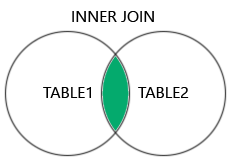
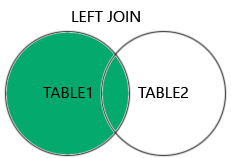
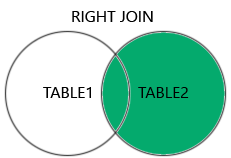
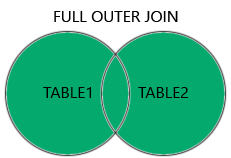

In [ ]:
res = cur.execute("SELECT o.OrderID, c.CustomerName, o.OrderDate \
                  FROM Orders AS o \
                  INNER JOIN Customers AS c ON o.CustomerID=c.CustomerID \
                  ORDER BY c.CustomerName, o.OrderID DESC \
                  LIMIT 5;")
# res = cur.execute("SELECT Orders.OrderID, Customers.CustomerName, Orders.OrderDate \
#                     FROM Orders \
#                     INNER JOIN Customers ON Orders.CustomerID=Customers.CustomerID \
#                   ORDER BY Customers.CustomerName, Orders.OrderID DESC \
#                   LIMIT 5;")

print(res.description)
res.fetchall()

(('OrderID', None, None, None, None, None, None), ('CustomerName', None, None, None, None, None, None), ('OrderDate', None, None, None, None, None, None))


[(10308, 'Ana Trujillo Emparedados y helados', '9/18/1996'),
 (10365, 'Antonio Moreno Taquería', '11/27/1996'),
 (10383, 'Around the Horn', '12/16/1996'),
 (10355, 'Around the Horn', '11/15/1996'),
 (10289, "B's Beverages", '8/26/1996')]

## INNER JOIN

The INNER JOIN keyword selects records that have matching values in both tables.
```sql
SELECT column_name(s)
FROM table1 AS t1
INNER JOIN table2 AS t2
ON t1.column_name = t2.column_name;
```

Note: The INNER JOIN keyword returns only rows with a match in both tables. Which means that if you have a product with no CategoryID, or with a CategoryID that is not present in the Categories table, that record would not be returned in the result.

JOIN and INNER JOIN will return the same result.

INNER is the default join type for JOIN, so when you write JOIN the parser actually writes INNER JOIN.

You can join multiple tables by nesting:
```sql
SELECT column_name(s)
FROM (table1 AS t1
INNER JOIN table2 AS t2 ON t1.column_name = t2.column_name)
INNER JOIN table3 AS t3 ON (t1 or t2).column_name = t3.column_name;
```

In [237]:
res = cur.execute("SELECT p.ProductID, p.ProductName, c.CategoryName \
                  FROM Products AS p \
                  INNER JOIN Categories as c \
                  ON c.CategoryID=p.CategoryID;")
res = cur.execute("SELECT p.ProductID, p.ProductName, c.CategoryName \
                  FROM Products AS p \
                  JOIN Categories as c \
                  ON c.CategoryID=p.CategoryID;")
res = cur.execute("SELECT o.OrderID, c.CustomerName, s.ShipperName \
                  FROM (Orders AS o \
                  INNER JOIN Customers AS c ON o.CustomerID=c.CustomerID) \
                  INNER JOIN Shippers AS s ON o.ShipperID=s.ShipperID;")

print(res.description)
res_fetch = res.fetchall()
print(len(res_fetch))
res_fetch

(('OrderID', None, None, None, None, None, None), ('CustomerName', None, None, None, None, None, None), ('ShipperName', None, None, None, None, None, None))
196


[(10248, 'Wilman Kala', 'Federal Shipping'),
 (10249, 'Tradição Hipermercados', 'Speedy Express'),
 (10250, 'Hanari Carnes', 'United Package'),
 (10251, 'Victuailles en stock', 'Speedy Express'),
 (10252, 'Suprêmes délices', 'United Package'),
 (10253, 'Hanari Carnes', 'United Package'),
 (10254, 'Chop-suey Chinese', 'United Package'),
 (10255, 'Richter Supermarkt', 'Federal Shipping'),
 (10256, 'Wellington Importadora', 'United Package'),
 (10257, 'HILARIÓN-Abastos', 'Federal Shipping'),
 (10258, 'Ernst Handel', 'Speedy Express'),
 (10259, 'Centro comercial Moctezuma', 'Federal Shipping'),
 (10260, 'Old World Delicatessen', 'Speedy Express'),
 (10261, 'Que Delícia', 'United Package'),
 (10262, 'Rattlesnake Canyon Grocery', 'Federal Shipping'),
 (10263, 'Ernst Handel', 'Federal Shipping'),
 (10264, 'Folk och fä HB', 'Federal Shipping'),
 (10265, 'Blondel père et fils', 'Speedy Express'),
 (10266, 'Wartian Herkku', 'Federal Shipping'),
 (10267, 'Frankenversand', 'Speedy Express'),
 (102

## LEFT JOIN, RIGHT JOIN, FULL OUTER JOIN

The LEFT JOIN keyword returns all records from the left table (table1), and the matching records from the right table (table2). The result is 0 records from the right side, if there is no match.
```sql
SELECT column_name(s)
FROM table1 as t1
LEFT JOIN table2 as t2
ON t1.column_name = t2.column_name;
```

Note: In some databases LEFT JOIN is called LEFT OUTER JOIN.

The RIGHT JOIN keyword returns all records from the right table (table2), and the matching records from the left table (table1). The result is 0 records from the left side, if there is no match.
```sql
SELECT column_name(s)
FROM table1 AS t1
RIGHT JOIN table2 AS t2
ON t1.column_name = t2.column_name;
```

Note: In some databases RIGHT JOIN is called RIGHT OUTER JOIN.

The FULL OUTER JOIN keyword returns all records when there is a match in left (table1) or right (table2) table records.

Tip: FULL OUTER JOIN and FULL JOIN are the same.
```sql
SELECT column_name(s)
FROM table1
FULL OUTER JOIN table2
ON table1.column_name = table2.column_name
WHERE condition; 
```

Note: FULL OUTER JOIN can potentially return very large result-sets!

In [ ]:
# Note: The LEFT JOIN keyword returns all records from the left table (Customers), even if there are no matches in the right table (Orders).
res = cur.execute("SELECT c.CustomerName, o.OrderID \
                  FROM Customers AS c \
                  LEFT JOIN Orders AS o \
                  ON c.CustomerID=o.CustomerID \
                  ORDER BY c.CustomerName;")
# Note: The RIGHT JOIN keyword returns all records from the right table (Employees), even if there are no matches in the left table (Orders).
res = cur.execute("SELECT e.LastName, e.FirstName, o.OrderID \
                  FROM Orders AS o \
                  RIGHT JOIN Employees as e \
                  ON o.EmployeeID = e.EmployeeID \
                  ORDER BY o.OrderID;")
# Note: The FULL OUTER JOIN keyword returns all matching records from both tables whether the other table matches or not. 
# So, if there are rows in "Customers" that do not have matches in "Orders", or if there are rows in "Orders" that do not have matches in "Customers", those rows will be listed as well.
res = cur.execute("SELECT c.CustomerName, o.OrderID \
                  FROM Customers AS c \
                  FULL OUTER JOIN Orders AS o \
                  ON c.CustomerID=o.CustomerID \
                  ORDER BY c.CustomerName;")

print(res.description)
res.fetchall()

## SELF JOIN

A self join is a regular join, but the table is joined with itself. T1 and T2 are different table aliases for the same table.
```sql
SELECT column_name(s)
FROM table1 T1, table1 T2
WHERE condition;
```

In [ ]:
# Get pairs of customers that are from the same city
res = cur.execute("SELECT A.CustomerName AS Customer1, B.CustomerName AS Customer2, A.City \
                  FROM Customers A, Customers B \
                  WHERE A.CustomerID <> B.CustomerID \
                  AND A.City=B.City \
                  ORDER BY A.City;")

print(res.description)
res.fetchall()

# UNION

The UNION operator is used to combine the result-set of two or more SELECT statements.
* Every SELECT statement within UNION must have the same number of columns
* The columns must also have similar data types
* The columns in every SELECT statement must also be in the same order
```sql
SELECT column_name(s) FROM table1
UNION
SELECT column_name(s) FROM table2; 
```

The UNION operator selects only distinct values by default. To allow duplicate values, use UNION ALL:
```sql
SELECT column_name(s) FROM table1
UNION ALL
SELECT column_name(s) FROM table2; 
```

Note: The column names in the result-set are usually equal to the column names in the first SELECT statement.

In [ ]:
res = cur.execute("SELECT City FROM Customers \
                  UNION \
                  SELECT City FROM Suppliers \
                  ORDER By City;")
res = cur.execute("SELECT City FROM Customers \
                  UNION ALL \
                  SELECT City FROM Suppliers \
                  ORDER By City;")
res = cur.execute("SELECT City, Country FROM Customers \
                  WHERE Country = 'Germany' \
                  UNION \
                  SELECT City, Country FROM Suppliers \
                  WHERE Country = 'Germany' \
                  ORDER BY City;")
res = cur.execute("SELECT City, Country FROM Customers \
                  WHERE Country = 'Germany' \
                  UNION ALL \
                  SELECT City, Country FROM Suppliers \
                  WHERE Country = 'Germany' \
                  ORDER BY City;")
# In this statement, the first column is a literal that is aliased as Type
# This lists all customers and suppliers and indicates which type they are
res = cur.execute("SELECT 'Customer' AS Type, ContactName, City, Country \
                  FROM Customers \
                  UNION \
                  SELECT 'Supplier', ContactName, City, Country \
                  FROM Suppliers;")
print(res.description)
print(len(res_fetch := res.fetchall()))
res_fetch

# GROUP BY

The GROUP BY statement groups rows that have the same values into summary rows, like "find the number of customers in each country".

The GROUP BY statement is often used with aggregate functions (COUNT(), MAX(), MIN(), SUM(), AVG()) to group the result-set by one or more columns.
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
ORDER BY column_name(s); 
```

In [271]:
# Number of customers per country, sorted in descending order
res = cur.execute("SELECT COUNT(CustomerID) AS [Number of Customers], Country \
                  FROM Customers \
                  GROUP BY Country \
                  ORDER BY COUNT(CustomerID) DESC;")
# 
res = cur.execute("SELECT s.ShipperName, COUNT(o.OrderID) AS [Number of Orders] FROM Orders AS o \
                  LEFT JOIN Shippers AS s ON s.ShipperID = o.ShipperID \
                  GROUP BY s.ShipperName \
                  ORDER BY s.ShipperName;")

print(res.description)
print(len(res_fetch := res.fetchall()))
res_fetch

(('ShipperName', None, None, None, None, None, None), ('Number of Orders', None, None, None, None, None, None))
3


[('Federal Shipping', 68), ('Speedy Express', 54), ('United Package', 74)]

# HAVING

The HAVING clause was added to SQL because the WHERE keyword cannot be used with aggregate functions. (WHERE is applied before the aggregate functions; HAVING is applied after the aggregate functions. In other words, WHERE filters rows; HAVING filters groups.)
```sql
SELECT column_name(s)
FROM table_name
WHERE condition
GROUP BY column_name(s)
HAVING condition
ORDER BY column_name(s);
```

In [279]:
res = cur.execute("SELECT * FROM Customers \
                  WHERE Country <> 'Mexico';")
res = cur.execute("SELECT COUNT(CustomerID), Country \
                  FROM Customers \
                  WHERE Country <> 'USA' \
                  GROUP BY Country \
                  HAVING COUNT(CustomerID) > 5 \
                  ORDER BY COUNT(CustomerID) DESC;")
res = cur.execute("SELECT e.LastName, COUNT(o.OrderID) as NumOrders \
                  FROM Employees AS e \
                  INNER JOIN Orders AS o ON e.EmployeeID = o.EmployeeID \
                  GROUP BY e.LastName \
                  HAVING COUNT(o.OrderID) > 10 \
                  ORDER BY COUNT(o.OrderID) DESC;")

res = cur.execute("SELECT e.LastName, COUNT(o.OrderID) AS NumOrders \
                  FROM Employees AS e \
                  INNER JOIN Orders AS o ON e.EmployeeID = o.EmployeeID \
                  WHERE e.LastName IN ('Davolio', 'Fuller') \
                  GROUP BY e.LastName \
                  HAVING COUNT(o.OrderID) > 25;")
print(res.description)
print(len(res_fetch := res.fetchall()))
res_fetch

(('LastName', None, None, None, None, None, None), ('NumOrders', None, None, None, None, None, None))
1


[('Davolio', 29)]

# EXISTS

The EXISTS operator is used to test for the existence of any record in a subquery.

The EXISTS operator returns TRUE if the subquery returns one or more records.

```sql
SELECT column_name(s)
FROM table_name
WHERE EXISTS
(SELECT column_name FROM table_name WHERE condition); 
```

Example:
```sql
SELECT SupplierName
FROM Suppliers
WHERE EXISTS (SELECT ProductName FROM Products WHERE Products.SupplierID = Suppliers.SupplierID AND Price < 20); 
```
This statement runs through each record in Suppliers. For each record, it checks whether there is a record in Products with a matching SupplierID and Price < 20. If there is, then it returns the SupplierName. Note that the column returned by the subquery - ProductName - is not used.

You can achieve the same thing with JOIN (but at greater cost):
```sql
SELECT DISTINCT Suppliers.SupplierName
FROM Suppliers INNER JOIN Products ON Products.SupplierID = Suppliers.SupplierID
WHERE Products.Price < 20
```

In [292]:
res = cur.execute("SELECT SupplierName FROM Suppliers \
                  WHERE EXISTS \
                  (SELECT ProductName FROM Products \
                  WHERE Products.SupplierID = Suppliers.SupplierID AND Products.Price < 20) \
                  ORDER BY SupplierName;")
# res = cur.execute("SELECT DISTINCT Suppliers.SupplierName \
#                   FROM Suppliers INNER JOIN Products ON Products.SupplierID = Suppliers.SupplierID \
#                   WHERE Products.Price < 20 \
#                   ORDER BY Suppliers.SupplierName;")
res = cur.execute("SELECT SupplierName FROM Suppliers \
                  WHERE EXISTS \
                  (SELECT ProductName FROM Products \
                  WHERE Products.SupplierID = Suppliers.SupplierID AND Products.Price = 22) \
                  ORDER BY SupplierName;")
print(res.description)
print(len(res_fetch := res.fetchall()))
res_fetch

(('SupplierName', None, None, None, None, None, None),)
1


[('New Orleans Cajun Delights',)]

# ANY, ALL

**Not supported by SQLite**

The ANY and ALL operators allow you to perform a comparison between a single column value and a range of other values.

The ANY operator:
* returns a boolean value as a result
* returns TRUE if ANY of the subquery values meet the condition

ANY means that the condition will be true if the operation is true for any of the values in the range.
```sql
SELECT column_name(s)
FROM table_name
WHERE column_name operator ANY
  (SELECT column_name
  FROM table_name
  WHERE condition); 
```

**Note:** The operator must be a standard comparison operator (=, <>, !=, >, >=, <, or <=).

To rephrase, since this explanation was not intuitive at all: We are comparing each value in column_name against all values returned by the subquery. If ANY comparison is TRUE with the given operator, then the entire WHERE clause returns TRUE. For ALL, ALL comparisons need to be TRUE for WHERE to return TRUE (otherwise FALSE).

The ALL operator:
* returns a boolean value as a result
* returns TRUE if ALL of the subquery values meet the condition
* is used with SELECT, WHERE and HAVING statements

ALL means that the condition will be true only if the operation is true for all values in the range. 
```sql
SELECT ALL column_name(s)
FROM table_name
WHERE condition; 

SELECT column_name(s)
FROM table_name
WHERE column_name operator ALL
  (SELECT column_name
  FROM table_name
  WHERE condition); 
```

In [378]:
# Lists the product name for any product where the order quantity is 10
cur.execute("""SELECT ProductName
            FROM Products
            WHERE ProductID = ANY (SELECT ProductID FROM OrderDetails WHERE Quantity = 10)
            ORDER BY ProductName;""")
res = cur.fetchall()
# Lists the product name for any product where the order quantity > 99
cur.execute("""SELECT ProductName
            FROM Products
            WHERE ProductID = ANY (SELECT ProductID FROM OrderDetails WHERE Quantity > 99)
            ORDER BY ProductName;""")
res = cur.fetchall()
# Lists the product name for any product where the order quantity is > 1000
cur.execute("""SELECT ProductName
            FROM Products
            WHERE ProductID = ANY (SELECT ProductID FROM OrderDetails WHERE Quantity > 1000)
            ORDER BY ProductName;""")
res = cur.fetchall()
# Lists all product names
cur.execute("""SELECT ALL ProductName
            FROM Products
            WHERE TRUE;""")
res = cur.fetchall()
# Basically returns nothing - only returns anything if there is only one product with order quantity 10, because you're saying the product ID needs to match ALL product IDs in the subquery
cur.execute("""SELECT ProductName
            FROM Products
            WHERE ProductID = ALL (SELECT ProductID FROM OrderDetails WHERE Quantity = 10)
            ORDER BY ProductName;""")
res = cur.fetchall()

print(cur.description)
print(len(res))
res

[('ProductName', 253, None, None, None, None, 1, 0, 255)]
0


[]

# SELECT INTO

**Not supported by SQLite. MySQL uses slightly different syntax.**

The SELECT INTO statement copies data from one table into a new table.

Copy all columns into a new table:
```sql
SELECT *
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition; 
```

Copy only some columns into a new table:
```sql
SELECT column1, column2, column3, ...
INTO newtable [IN externaldb]
FROM oldtable
WHERE condition; 
```

The new table will be created with the column-names and types as defined in the old table. You can create new column names using the AS clause.

Tip: SELECT INTO can also be used to create a new, empty table using the schema of another. Just add a WHERE clause that causes the query to return no data:
```sql
SELECT * INTO newtable
FROM oldtable
WHERE 1 = 0; 
```

In [4]:
con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
    database="Northwind",
)
cur = con.cursor()

In [ ]:
# Make a copy of a table

cur.execute("""CREATE TABLE IF NOT EXISTS CustomersBackup2025
            SELECT * FROM Customers;""")
cur.execute("SHOW TABLES LIKE 'Customers%';")
print(cur.fetchall())
cur.execute("SELECT COUNT(*) FROM CustomersBackup2025;")
print(cur.fetchall())

[('Customers',), ('CustomersBackup2025',)]
[(91,)]


In [ ]:
# Make a copy of a table but without records

cur.execute("CREATE TABLE IF NOT EXISTS CustomersBackup2025Fresh LIKE Customers;")
cur.execute("SHOW TABLES LIKE 'Customers%';")
print(cur.fetchall())
cur.execute("SELECT COUNT(*) FROM CustomersBackup2025Fresh;")
print(cur.fetchall())
cur.execute("SHOW COLUMNS FROM CustomersBackup2025Fresh;")
print(cur.fetchall())

[('Customers',), ('CustomersBackup2025',), ('CustomersBackup2025Fresh',)]
[(0,)]
[('CustomerID', 'int', 'NO', 'PRI', None, 'auto_increment'), ('CustomerName', 'varchar(50)', 'YES', '', None, ''), ('ContactName', 'varchar(50)', 'YES', '', None, ''), ('Address', 'varchar(50)', 'YES', '', None, ''), ('City', 'varchar(20)', 'YES', '', None, ''), ('PostalCode', 'varchar(10)', 'YES', '', None, ''), ('Country', 'varchar(15)', 'YES', '', None, '')]


In [ ]:
# Make a copy of specific columns in a table with rows filtered by a WHERE condition

cur.execute("""CREATE TABLE IF NOT EXISTS CustomersBackup2025Filtered
            SELECT CustomerID, CustomerName, Country FROM Customers
            WHERE Country = 'Germany';""")
cur.execute("SHOW TABLES LIKE 'Customers%';")
print(cur.fetchall())
cur.execute("SELECT COUNT(*) FROM CustomersBackup2025Filtered;")
print(cur.fetchall())
cur.execute("SHOW COLUMNS FROM CustomersBackup2025Filtered;")
print(cur.fetchall())
cur.execute("SELECT Country FROM CustomersBackup2025Filtered;")
print(cur.fetchall())

[('Customers',), ('CustomersBackup2025',), ('CustomersBackup2025Filtered',), ('CustomersBackup2025Fresh',)]
[(11,)]
[('CustomerID', 'int', 'NO', '', '0', ''), ('CustomerName', 'varchar(50)', 'YES', '', None, ''), ('Country', 'varchar(15)', 'YES', '', None, '')]
[('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',), ('Germany',)]


In [12]:
# Make a copy of multiple tables into one

cur.execute("""CREATE TABLE IF NOT EXISTS CustomersOrders
            SELECT Customers.CustomerID, Orders.OrderID FROM Customers
            LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
            ORDER BY Customers.CustomerID;""")
cur.execute("SHOW TABLES LIKE 'Customer%';")
print(cur.fetchall())
cur.execute("SELECT * FROM CustomersOrders;")
print(cur.fetchall())

[('Customers',), ('CustomersBackup2025',), ('CustomersBackup2025Filtered',), ('CustomersBackup2025Fresh',), ('CustomersOrders',)]
[(1, None), (2, 10308), (3, 10365), (4, 10355), (4, 10383), (5, 10278), (5, 10280), (5, 10384), (6, None), (7, 10265), (7, 10297), (7, 10360), (7, 10436), (8, 10326), (9, 10331), (9, 10340), (9, 10362), (10, 10389), (10, 10410), (10, 10411), (10, 10431), (11, 10289), (12, None), (13, 10259), (14, 10254), (14, 10370), (15, 10290), (16, 10435), (17, 10363), (17, 10391), (18, 10311), (19, 10364), (19, 10400), (20, 10258), (20, 10263), (20, 10351), (20, 10368), (20, 10382), (20, 10390), (20, 10402), (20, 10403), (20, 10430), (20, 10442), (21, 10347), (21, 10386), (21, 10414), (22, None), (23, 10408), (24, 10264), (24, 10327), (24, 10378), (24, 10434), (25, 10267), (25, 10337), (25, 10342), (25, 10396), (26, None), (27, 10422), (28, 10328), (28, 10352), (29, 10366), (29, 10426), (30, 10303), (31, 10423), (32, None), (33, 10268), (34, 10250), (34, 10253), (35, 102

In [9]:
cur.execute("SHOW COLUMNS FROM Customers;")
print(cur.fetchall())
cur.execute("SHOW COLUMNS FROM Orders;")
print(cur.fetchall())

[('CustomerID', 'int', 'NO', 'PRI', None, 'auto_increment'), ('CustomerName', 'varchar(50)', 'YES', '', None, ''), ('ContactName', 'varchar(50)', 'YES', '', None, ''), ('Address', 'varchar(50)', 'YES', '', None, ''), ('City', 'varchar(20)', 'YES', '', None, ''), ('PostalCode', 'varchar(10)', 'YES', '', None, ''), ('Country', 'varchar(15)', 'YES', '', None, '')]
[('OrderID', 'int', 'NO', 'PRI', None, 'auto_increment'), ('CustomerID', 'int', 'YES', 'MUL', None, ''), ('EmployeeID', 'int', 'YES', 'MUL', None, ''), ('OrderDate', 'datetime', 'YES', '', None, ''), ('ShipperID', 'int', 'YES', 'MUL', None, '')]


In [2]:
# Create new database and copy table to new database

con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
)
cur = con.cursor()

cur.execute("CREATE DATABASE IF NOT EXISTS NorthwindBackup;")
cur.execute("SHOW DATABASES;")
print(cur.fetchall())

cur.execute("""CREATE TABLE IF NOT EXISTS NorthwindBackup.CustomersBackup2025
            SELECT * FROM Northwind.Customers;""")

cur.execute("SHOW TABLES FROM NorthwindBackup;")
print(cur.fetchall())
cur.execute("SELECT COUNT(*) FROM NorthwindBackup.CustomersBackup2025;")
print(cur.fetchall())

[('Northwind',), ('NorthwindBackup',), ('information_schema',), ('mysql',), ('performance_schema',), ('sys',)]
[('CustomersBackup2025',)]
[(91,)]


# INSERT INTO ... SELECT

The INSERT INTO SELECT statement copies data from one table and inserts it into another table.

The INSERT INTO SELECT statement requires that the data types in source and target tables match.

Note: The existing records in the target table are unaffected.

Copy all columns from one table to another table:
```sql
INSERT INTO table2
SELECT * FROM table1
WHERE condition;
```

Copy only some columns from one table into another table:
```sql
INSERT INTO table2 (column1, column2, column3, ...)
SELECT column1, column2, column3, ...
FROM table1
WHERE condition; 
```

In [ ]:
# Copy "Suppliers" into "Customers". The columns that aren't inserted into will contain NULL. Suppliers.SupplierName is copied into Customers.CustomerName.
cur.execute("DROP TABLE IF EXISTS CustomersForInsert;")
cur.execute("CREATE TABLE IF NOT EXISTS CustomersForInsert LIKE Customers;")
cur.execute("""INSERT INTO CustomersForInsert (CustomerName, City, Country)
            SELECT SupplierName, City, Country FROM Suppliers;""")
cur.execute("""SELECT CustomerName FROM CustomersForInsert;""")
print(cur.fetchall())
cur.execute("""SELECT SupplierName FROM Suppliers;""")
print(cur.fetchall())

[('Exotic Liquid',), ('New Orleans Cajun Delights',), ("Grandma Kelly's Homestead",), ('Tokyo Traders',), ("Cooperativa de Quesos 'Las Cabras'",), ("Mayumi's",), ('Pavlova, Ltd.',), ('Specialty Biscuits, Ltd.',), ('PB Knäckebröd AB',), ('Refrescos Americanas LTDA',), ('Heli Süßwaren GmbH & Co. KG',), ('Plutzer Lebensmittelgroßmärkte AG',), ('Nord-Ost-Fisch Handelsgesellschaft mbH',), ('Formaggi Fortini s.r.l.',), ('Norske Meierier',), ('Bigfoot Breweries',), ('Svensk Sjöföda AB',), ('Aux joyeux ecclésiastiques',), ('New England Seafood Cannery',), ('Leka Trading',), ('Lyngbysild',), ('Zaanse Snoepfabriek',), ('Karkki Oy',), ("G'day, Mate",), ('Ma Maison',), ('Pasta Buttini s.r.l.',), ('Escargots Nouveaux',), ('Gai pâturage',), ("Forêts d'érables",)]
[('Exotic Liquid',), ('New Orleans Cajun Delights',), ("Grandma Kelly's Homestead",), ('Tokyo Traders',), ("Cooperativa de Quesos 'Las Cabras'",), ("Mayumi's",), ('Pavlova, Ltd.',), ('Specialty Biscuits, Ltd.',), ('PB Knäckebröd AB',), ('Re

In [ ]:
# Copy "Suppliers" into "Customers" (fill all columns)
cur.execute("DROP TABLE IF EXISTS CustomersForInsert;")
cur.execute("CREATE TABLE IF NOT EXISTS CustomersForInsert LIKE Customers;")
cur.execute("""INSERT INTO CustomersForInsert (CustomerName, ContactName, Address, City, PostalCode, Country)
            SELECT SupplierName, ContactName, Address, City, PostalCode, Country FROM Suppliers;""")
cur.execute("""SELECT * FROM CustomersForInsert LIMIT 5;""")
print(cur.fetchall())
cur.execute("SELECT SupplierID, SupplierName, ContactName, Address, City, PostalCode, Country FROM Suppliers LIMIT 5;")
print(cur.fetchall())

[(1, 'Exotic Liquid', 'Charlotte Cooper', '49 Gilbert St.', 'Londona', 'EC1 4SD', 'UK'), (2, 'New Orleans Cajun Delights', 'Shelley Burke', 'P.O. Box 78934', 'New Orleans', '70117', 'USA'), (3, "Grandma Kelly's Homestead", 'Regina Murphy', '707 Oxford Rd.', 'Ann Arbor', '48104', 'USA'), (4, 'Tokyo Traders', 'Yoshi Nagase', '9-8 Sekimai Musashino-shi', 'Tokyo', '100', 'Japan'), (5, "Cooperativa de Quesos 'Las Cabras'", 'Antonio del Valle Saavedra', 'Calle del Rosal 4', 'Oviedo', '33007', 'Spain')]
[(1, 'Exotic Liquid', 'Charlotte Cooper', '49 Gilbert St.', 'Londona', 'EC1 4SD', 'UK'), (2, 'New Orleans Cajun Delights', 'Shelley Burke', 'P.O. Box 78934', 'New Orleans', '70117', 'USA'), (3, "Grandma Kelly's Homestead", 'Regina Murphy', '707 Oxford Rd.', 'Ann Arbor', '48104', 'USA'), (4, 'Tokyo Traders', 'Yoshi Nagase', '9-8 Sekimai Musashino-shi', 'Tokyo', '100', 'Japan'), (5, "Cooperativa de Quesos 'Las Cabras'", 'Antonio del Valle Saavedra', 'Calle del Rosal 4', 'Oviedo', '33007', 'Spain

In [28]:
# Copy only the German suppliers into "Customers"
cur.execute("DROP TABLE IF EXISTS CustomersForInsert;")
cur.execute("CREATE TABLE IF NOT EXISTS CustomersForInsert LIKE Customers;")
cur.execute("""INSERT INTO CustomersForInsert (CustomerName, City, Country)
            SELECT SupplierName, City, Country FROM Suppliers
            WHERE Suppliers.Country = 'Germany';""")
cur.execute("SELECT CustomerName, City, Country FROM CustomersForInsert;")
print(cur.fetchall())
cur.execute("SELECT SupplierName, City, Country FROM Suppliers WHERE Country = 'Germany';")
print(cur.fetchall())

[('Heli Süßwaren GmbH & Co. KG', 'Berlin', 'Germany'), ('Plutzer Lebensmittelgroßmärkte AG', 'Frankfurt', 'Germany'), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 'Cuxhaven', 'Germany')]
[('Heli Süßwaren GmbH & Co. KG', 'Berlin', 'Germany'), ('Plutzer Lebensmittelgroßmärkte AG', 'Frankfurt', 'Germany'), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 'Cuxhaven', 'Germany')]


# CASE

The CASE expression goes through conditions and returns a value when the first condition is met (like an if-then-else statement). So, once a condition is true, it will stop reading and return the result. If no conditions are true, it returns the value in the ELSE clause.

If there is no ELSE part and no conditions are true, it returns NULL.
```sql
CASE
    WHEN condition1 THEN result1
    WHEN condition2 THEN result2
    WHEN conditionN THEN resultN
    ELSE result
END; 
```

In [ ]:
# Returns two columns and a third column that is constructed based on the Quantity column
cur.execute("""SELECT OrderID, Quantity,
            CASE
                WHEN Quantity > 30 THEN 'Quantity > 30'
                WHEN Quantity = 30 THEN 'Quantity = 30'
                ELSE 'Quantity < 30'
            END
            AS QuantityText
            FROM OrderDetails;""")
res = cur.fetchall()
# This sorts by city. However, if city is NULL, then it uses country. This isn't really a useful construction.
# Also, none of the cities are NULL in Customers.
cur.execute("""SELECT City, Country FROM Customers
            ORDER BY
            (CASE
                WHEN CITY is NULL THEN Country
                ELSE City
            END);""")
res = cur.fetchall()

print(cur.description)
for r in res:
    print(r)

[('City', 253, None, None, None, None, 1, 0, 255), ('Country', 253, None, None, None, None, 1, 0, 255)]
('Aachen', 'Germany')
('Albuquerque', 'USA')
('Anchorage', 'USA')
('Århus', 'Denmark')
('Barcelona', 'Spain')
('Barquisimeto', 'Venezuela')
('Bergamo', 'Italy')
('Berlin', 'Germany')
('Bern', 'Switzerland')
('Boise', 'USA')
('Bräcke', 'Sweden')
('Brandenburg', 'Germany')
('Bruxelles', 'Belgium')
('Buenos Aires', 'Argentina')
('Buenos Aires', 'Argentina')
('Buenos Aires', 'Argentina')
('Butte', 'USA')
('Campinas', 'Brazil')
('Caracas', 'Venezuela')
('Charleroi', 'Belgium')
('Cork', 'Ireland')
('Cowes', 'UK')
('Cunewalde', 'Germany')
('Elgin', 'USA')
('Eugene', 'USA')
('Frankfurt a.M.', 'Germany')
('Genève', 'Switzerland')
('Graz', 'Austria')
('Helsinki', 'Finland')
('I. de Margarita', 'Venezuela')
('Kirkland', 'USA')
('København', 'Denmark')
('Köln', 'Germany')
('Lander', 'USA')
('Leipzig', 'Germany')
('Lille', 'France')
('Lisboa', 'Portugal')
('Lisboa', 'Portugal')
('London', 'UK')
(

# IFNULL(), ISNULL(), COALESCE(), NVL()

The MySQL IFNULL() function lets you return an alternative value if an expression is NULL:
```sql
SELECT ProductName, UnitPrice * (UnitsInStock + IFNULL(UnitsOnOrder, 0))
FROM Products; 
```

All of these functions do the same thing but for different RDBMS.

In [ ]:
# cur.execute("SHOW COLUMNS FROM Products;")
# cur.execute("SHOW TABLES;")
# cur.execute("SELECT * FROM Products LIMIT 5;")
# cur.execute("SELECT DISTINCT CategoryID FROM Products;")
# cur.execute("SELECT CategoryID, COUNT(*) FROM Products GROUP BY CategoryID;")
# cur.execute("SELECT CategoryID, ProductName FROM Products WHERE CategoryID = 4")

# Create new table with some null values
# cur.execute("DROP TABLE IF EXISTS ProductsNull;")
# cur.execute("""CREATE TABLE IF NOT EXISTS ProductsNull
#             SELECT * FROM Products;""")
# cur.execute("""UPDATE ProductsNull SET Price=NULL WHERE CategoryID=4;""")
# cur.execute("SELECT * FROM ProductsNull WHERE CategoryID = 4;")
# cur.execute("SELECT DISTINCT CategoryID FROM ProductsNull WHERE Price IS NOT NULL ORDER BY CategoryID;")

# cur.execute("SELECT DISTINCT IFNULL(Price, 0) AS PriceNULL FROM ProductsNull WHERe CategoryID=4;")
cur.execute("SELECT DISTINCT IFNULL(Price, 0) AS PriceNull FROM ProductsNull WHERE CategoryID<>4 Order by PriceNull;")
print(cur.description)
res = cur.fetchall()
for r in res:
    print(r)

[('PriceNull', 246, None, None, None, None, 0, 32769, 63)]
(Decimal('5'),)
(Decimal('6'),)
(Decimal('7'),)
(Decimal('8'),)
(Decimal('9'),)
(Decimal('10'),)
(Decimal('12'),)
(Decimal('13'),)
(Decimal('14'),)
(Decimal('15'),)
(Decimal('16'),)
(Decimal('17'),)
(Decimal('18'),)
(Decimal('19'),)
(Decimal('20'),)
(Decimal('21'),)
(Decimal('22'),)
(Decimal('23'),)
(Decimal('24'),)
(Decimal('25'),)
(Decimal('26'),)
(Decimal('29'),)
(Decimal('30'),)
(Decimal('31'),)
(Decimal('33'),)
(Decimal('38'),)
(Decimal('39'),)
(Decimal('40'),)
(Decimal('44'),)
(Decimal('46'),)
(Decimal('49'),)
(Decimal('53'),)
(Decimal('63'),)
(Decimal('81'),)
(Decimal('97'),)
(Decimal('124'),)
(Decimal('264'),)


# Stored Procedures

**MySQL syntax is different from what's pasted here.**

A stored procedure is a prepared SQL code that you can save, so the code can be reused over and over again.

So if you have an SQL query that you write over and over again, save it as a stored procedure, and then just call it to execute it.

You can also pass parameters to a stored procedure, so that the stored procedure can act based on the parameter value(s) that is passed.

<u>Create the procedure:</u>
```sql
CREATE PROCEDURE procedure_name
AS
sql_statement
GO; 
```
<u>Execute the procedure:</u>
```sql
EXEC procedure_name; 
```

In [8]:
cur.execute("SHOW PROCEDURE STATUS;")
print(cur.description)
cur.fetchall()

[('Db', 253, None, None, None, None, 0, 4225, 255), ('Name', 253, None, None, None, None, 0, 4097, 255), ('Type', 254, None, None, None, None, 0, 4481, 255), ('Definer', 253, None, None, None, None, 0, 4225, 255), ('Modified', 7, None, None, None, None, 0, 4225, 63), ('Created', 7, None, None, None, None, 0, 4225, 63), ('Security_type', 254, None, None, None, None, 0, 4481, 255), ('Comment', 252, None, None, None, None, 0, 4241, 255), ('character_set_client', 253, None, None, None, None, 0, 4097, 255), ('collation_connection', 253, None, None, None, None, 0, 4097, 255), ('Database Collation', 253, None, None, None, None, 0, 4097, 255)]


[('Northwind',
  'SelectAllCustomers',
  'PROCEDURE',
  'ryanwtsai@localhost',
  datetime.datetime(2025, 5, 12, 16, 38),
  datetime.datetime(2025, 5, 12, 16, 38),
  'DEFINER',
  '',
  'utf8mb4',
  'utf8mb4_0900_ai_ci',
  'utf8mb4_0900_ai_ci'),
 ('sys',
  'create_synonym_db',
  'PROCEDURE',
  'mysql.sys@localhost',
  datetime.datetime(2025, 5, 7, 16, 17, 58),
  datetime.datetime(2025, 5, 7, 16, 17, 58),
  'INVOKER',
  '\nDescription\n-----------\n\nTakes a source database name and synonym name, and then creates the \nsynonym database with views that point to all of the tables within\nthe source database.\n\nUseful for creating a "ps" synonym for "performance_schema",\nor "is" instead of "information_schema", for example.\n\nParameters\n-----------\n\nin_db_name (VARCHAR(64)):\n  The database name that you would like to create a synonym for.\nin_synonym (VARCHAR(64)):\n  The database synonym name.\n\nExample\n-----------\n\nmysql> SHOW DATABASES;\n+--------------------+\n| Database      

In [ ]:
# Zero input variables

cur.execute("DROP PROCEDURE IF EXISTS SelectAllCustomers;")
cur.execute("""
            delimiter //
            CREATE PROCEDURE IF NOT EXISTS SelectAllCustomers ()
            BEGIN
                SELECT * FROM Customers;
            END//""")
cur.execute("CALL SelectAllCustomers;")

res = cur.fetchall()
print(len(res))

# Apparently you have to close the connection after calling a procedure
cur.close()
con.close()

con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
    database="Northwind",
)
cur = con.cursor()

91


In [29]:
# One input variable

cur.execute("DROP PROCEDURE IF EXISTS SelectAllCustomersFromCity;")
cur.execute("""
            delimiter //
            CREATE PROCEDURE IF NOT EXISTS SelectAllCustomersFromCity (IN city VARCHAR(30))
            BEGIN
                SELECT CustomerName, City, PostalCode, Country FROM Customers WHERE Customers.City = city;
            END//""")
cur.execute("CALL SelectAllCustomersFromCity('London');")

for r in (res := cur.fetchall()):
    print(r)

# Apparently you have to close the connection after calling a procedure
cur.close()
con.close()

con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
    database="Northwind",
)
cur = con.cursor()

('Around the Horn', 'London', 'WA1 1DP', 'UK')
("B''s Beverages", 'London', 'EC2 5NT', 'UK')
('Consolidated Holdings', 'London', 'WX1 6LT', 'UK')
('Eastern Connection', 'London', 'WX3 6FW', 'UK')
('North/South', 'London', 'SW7 1RZ', 'UK')
('Seven Seas Imports', 'London', 'OX15 4NB', 'UK')


In [28]:
# Multiple input variables

cur.execute("DROP PROCEDURE IF EXISTS SelectAllCustomersFromCityAndPostalCode;")
cur.execute("""
            delimiter //
            CREATE PROCEDURE IF NOT EXISTS SelectAllCustomersFromCityAndPostalCode (IN city VARCHAR(30), IN postalcode VARCHAR(30))
            BEGIN
                SELECT CustomerName, City, PostalCode, Country FROM Customers WHERE Customers.City = city AND Customers.PostalCode = postalcode;
            END//""")
cur.execute("CALL SelectAllCustomersFromCityAndPostalCode('London', 'WA1 1DP');")

for r in (res := cur.fetchall()):
    print(r)

# Apparently you have to close the connection after calling a procedure
cur.close()
con.close()

con = mysql.connector.connect(
    host="localhost",
    user=os.environ.get("MYSQL_USER"),
    password=os.environ.get("MYSQL_PW"),
    database="Northwind",
)
cur = con.cursor()

('Around the Horn', 'London', 'WA1 1DP', 'UK')


# SQL Database

## CREATE VIEW

In SQL, a view is a virtual table based on the result-set of an SQL statement.

A view contains rows and columns, just like a real table. The fields in a view are fields from one or more real tables in the database.

You can add SQL statements and functions to a view and present the data as if the data were coming from one single table.

A view is created with the CREATE VIEW statement. 
```sql
CREATE VIEW view_name AS
SELECT column1, column2, ...
FROM table_name
WHERE condition; 
```

In [40]:
cur.execute("""CREATE OR REPLACE VIEW BrazilCustomers AS
            SELECT CustomerName, ContactName
            FROM Customers
            WHERE Country = 'Brazil';""")
cur.execute("SELECT * FROM BrazilCustomers;")

for r in (res := cur.fetchall()):
    print(r)

('Comércio Mineiro', 'Pedro Afonso')
('Familia Arquibaldo', 'Aria Cruz')
('Gourmet Lanchonetes', 'André Fonseca')
('Hanari Carnes', 'Mario Pontes')
('Que Delícia', 'Bernardo Batista')
('Queen Cozinha', 'Lúcia Carvalho')
('Ricardo Adocicados', 'Janete Limeira')
('Tradição Hipermercados', 'Anabela Domingues')
('Wellington Importadora', 'Paula Parente')


In [42]:
cur.execute("SELECT SUBSTRING('SQL TUTORIAL', -3, 3);")
cur.fetchall()

[('IAL',)]

In [49]:
cur.execute("SHOW DATABASES;")
cur.fetchall()

[('Northwind',),
 ('NorthwindBackup',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sys',)]